## My Goal is to determine the MVP based on the PER Category. 

##### I believe PER is a good indicator to determine MVP as it includes all statistics and factors in valuable context

##### PER is (Player Efficiency Rating) – A rating developed by John Hollinger that summarizes a player’s overall statistical performance in a per-minute basis. The league average is always set to 15.

In [113]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [114]:
player_stats = pd.read_csv("/Users/sa20/Desktop/nba-stats-api/data/player_stats/merge2000-2024.csv")
mvps = pd.read_csv("/Users/sa20/Desktop/nba-stats-api/data/MVPs.csv")
adv_player_stats = pd.read_csv("/Users/sa20/Desktop/nba-stats-api/data/advanced_stats/merge2000-2024.csv")

In [115]:
print(mvps)


       Year                 Player Voting  Age   Tm   G    MP   PTS   TRB  \
0   2023-24           Nikola Jokić    (V)   28  DEN  79  34.6  26.4  12.4   
1   2022-23            Joel Embiid    (V)   28  PHI  66  34.6  33.1  10.2   
2   2021-22           Nikola Jokić    (V)   26  DEN  74  33.5  27.1  13.8   
3   2020-21           Nikola Jokić    (V)   25  DEN  72  34.6  26.4  10.8   
4   2019-20  Giannis Antetokounmpo    (V)   25  MIL  63  30.4  29.5  13.6   
5   2018-19  Giannis Antetokounmpo    (V)   24  MIL  72  32.8  27.7  12.5   
6   2017-18           James Harden    (V)   28  HOU  72  35.4  30.4   5.4   
7   2016-17      Russell Westbrook    (V)   28  OKC  81  34.6  31.6  10.7   
8   2015-16          Stephen Curry    (V)   27  GSW  79  34.2  30.1   5.4   
9   2014-15          Stephen Curry    (V)   26  GSW  80  32.7  23.8   4.3   
10  2013-14           Kevin Durant    (V)   25  OKC  81  38.5  32.0   7.4   
11  2012-13           LeBron James    (V)   28  MIA  76  37.9  26.8   8.0   

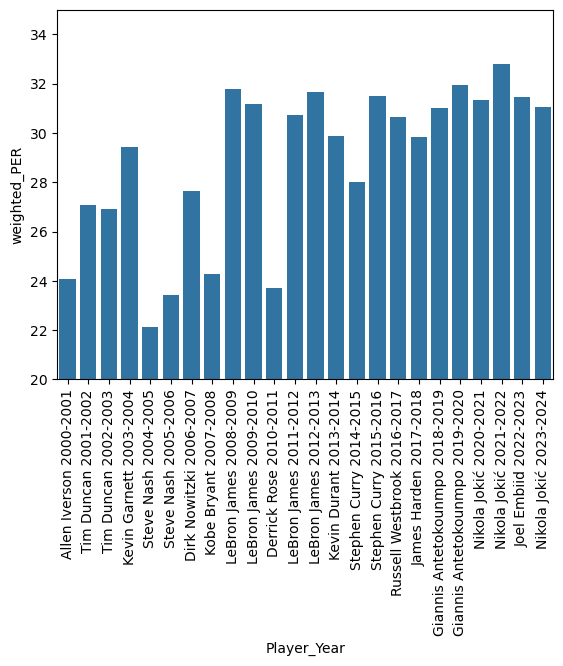

In [116]:
# Calculate the age score based on absolute difference 
avg_age = mvps["Age"].mean()
adv_player_stats["age_score"] = abs(adv_player_stats["Age"] - avg_age) / adv_player_stats["Age"]
adv_player_stats["Player_Year"] = adv_player_stats["Player"] + " " + adv_player_stats["Year"]
adv_player_stats["weighted_PER"] = adv_player_stats["PER"] + adv_player_stats["age_score"]
adv_player_stats = adv_player_stats.set_index("Player_Year")
adv_player_stats = adv_player_stats.dropna()
adv_player_stats_all = adv_player_stats.sort_values("Year")
adv_mvp_stats = adv_player_stats_all[adv_player_stats_all["Awards"].str.contains(r"^MVP-1(?!\d)")]  
# ^MVP-1]: Matches "MVP-" followed by a digit of 1 at the start of the string.
# (?!\d): This is a negative lookahead. It ensures that no additional digits follow after "MVP-1". It prevents matching strings like "MVP-10" and "MVP-11".
sns.barplot(adv_mvp_stats, x=adv_mvp_stats.index, y= adv_mvp_stats["weighted_PER"])
plt.ylim(20,35)
plt.xticks(rotation=90)
plt.show()

#### I took the average age of all the MVPs to determine which MVP had the strongest year amongst all MVPs from the past 24 years according to their age score and PER category. From this data, Jokic had the strongest year amongst all MVPs in 2021-2022 and Steve Nash had the weakest years from 2003-2005 due to him being the oldest MVP in the past 24 years.

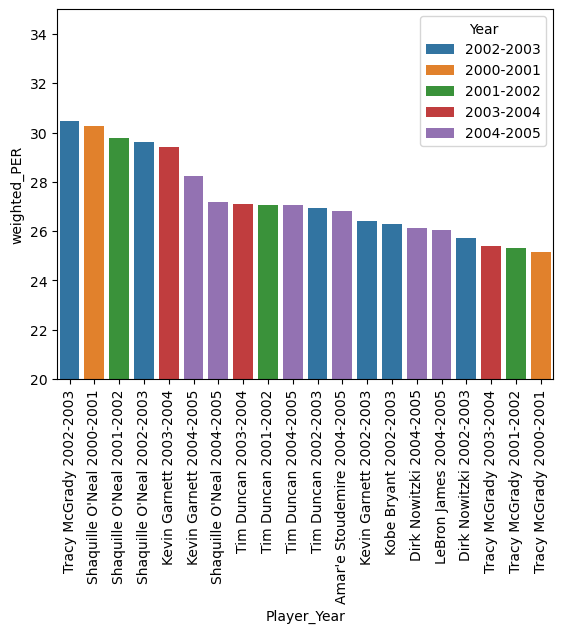

In [117]:
# In order to reduce the number of evaluations, I am going to filter in groups of 5 seasons
adv_player_stats_2000_2005 = adv_player_stats[(adv_player_stats["Year"] == "2000-2001") | (adv_player_stats["Year"] == "2001-2002") | (adv_player_stats["Year"] == "2002-2003") | (adv_player_stats["Year"] == "2003-2004") | (adv_player_stats["Year"] == "2004-2005")] 
# Sorting high-low based on weighted_PER
adv_player_stats_2000_2005 = adv_player_stats_2000_2005.sort_values("weighted_PER", ascending= False)
# Top 20 players for the time frame
adv_player_stats_2000_2005 = adv_player_stats_2000_2005.head(20)
# Plot using Year as a hue to differentiate between seasons
sns.barplot(adv_player_stats_2000_2005, x=adv_player_stats_2000_2005.index, y= adv_player_stats_2000_2005["weighted_PER"], hue=adv_player_stats_2000_2005["Year"])
plt.ylim(20,35)
plt.xticks(rotation=90)
plt.show()


I am determing that the player with the highest weighted PER is going to determine MVP, with that in mind:

##### MVP 2000-2001 Shaquille O'Neal
##### MVP 2001-2002 Shaquille O'Neal
##### MVP 2002-2003 Tracy McGrady
##### MVP 2003-2004 Kevin Garnett
##### MVP 2004-2005 Kevin Garnett

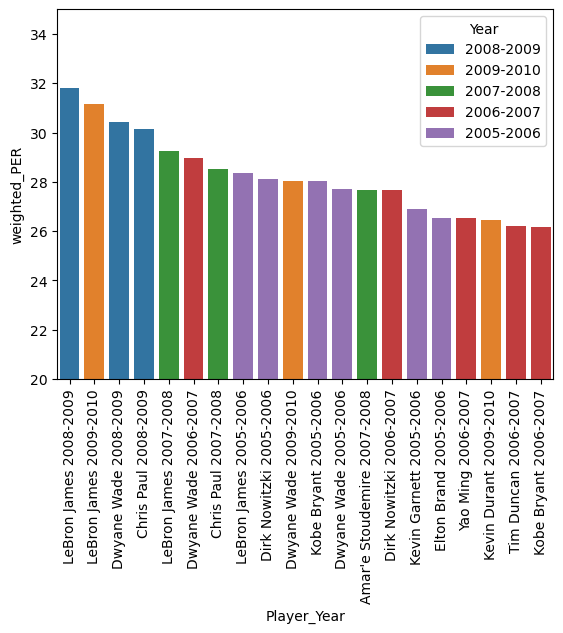

In [118]:
# Repeating Process for 2005-2010
adv_player_stats_2005_2010 = adv_player_stats[(adv_player_stats["Year"] == "2005-2006") | (adv_player_stats["Year"] == "2006-2007") | (adv_player_stats["Year"] == "2007-2008") | (adv_player_stats["Year"] == "2008-2009") | (adv_player_stats["Year"] == "2009-2010")] 
adv_player_stats_2005_2010 = adv_player_stats_2005_2010.sort_values("weighted_PER", ascending= False)
adv_player_stats_2005_2010 = adv_player_stats_2005_2010.head(20)
sns.barplot(adv_player_stats_2005_2010, x=adv_player_stats_2005_2010.index, y= adv_player_stats_2005_2010["weighted_PER"], hue=adv_player_stats_2005_2010["Year"])
plt.ylim(20,35)
plt.xticks(rotation=90)
plt.show()


##### MVP 2005-2006 Lebron James
##### MVP 2006-2007 Dwayne Wade
##### MVP 2007-2008 Lebron James
##### MVP 2008-2009 Lebron James
##### MVP 2009-2010 Lebron James

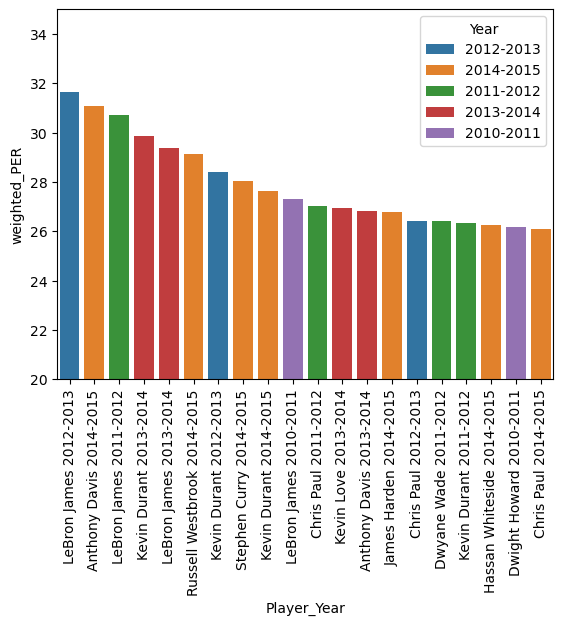

In [119]:
# Repeating Process 2010-2015
adv_player_stats_2010_2015 = adv_player_stats[(adv_player_stats["Year"] == "2010-2011") | (adv_player_stats["Year"] == "2011-2012") | (adv_player_stats["Year"] == "2012-2013") | (adv_player_stats["Year"] == "2013-2014") | (adv_player_stats["Year"] == "2014-2015")] 
adv_player_stats_2010_2015 = adv_player_stats_2010_2015.sort_values("weighted_PER", ascending= False)
adv_player_stats_2010_2015 = adv_player_stats_2010_2015.head(20)
sns.barplot(adv_player_stats_2010_2015, x=adv_player_stats_2010_2015.index, y= adv_player_stats_2010_2015["weighted_PER"], hue=adv_player_stats_2010_2015["Year"])
plt.ylim(20,35)
plt.xticks(rotation=90)
plt.show()

##### MVP 2010-2011 Lebron James
##### MVP 2011-2012 Lebron James
##### MVP 2012-2013 Lebron James
##### MVP 2013-2014 Lebron James
##### MVP 2014-2015 Anthony Davis

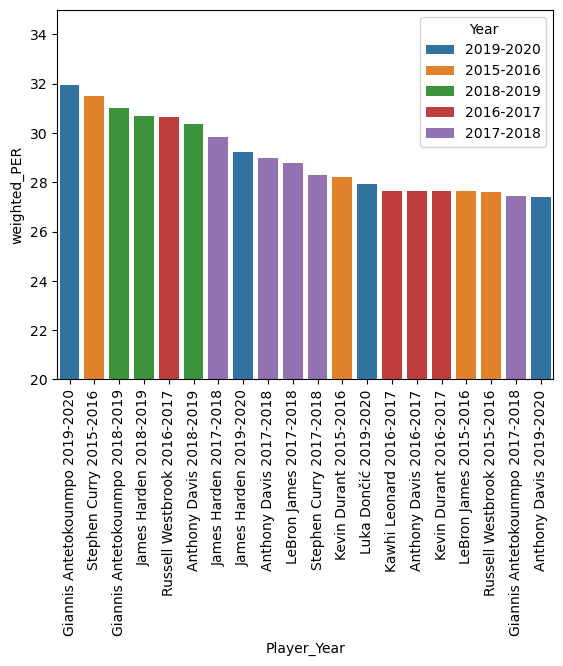

In [120]:
# Repeating Process for 2015-2020
adv_player_stats_2015_2020 = adv_player_stats[(adv_player_stats["Year"] == "2015-2016") | (adv_player_stats["Year"] == "2016-2017") | (adv_player_stats["Year"] == "2017-2018") | (adv_player_stats["Year"] == "2018-2019") | (adv_player_stats["Year"] == "2019-2020")] 
adv_player_stats_2015_2020 = adv_player_stats_2015_2020.sort_values("weighted_PER", ascending= False)
adv_player_stats_2015_2020 = adv_player_stats_2015_2020.head(20)
sns.barplot(adv_player_stats_2015_2020, x=adv_player_stats_2015_2020.index, y= adv_player_stats_2015_2020["weighted_PER"], hue=adv_player_stats_2015_2020["Year"])
plt.ylim(20,35)
plt.xticks(rotation=90)
plt.show()


##### MVP 2015-2016 Stephen Curry
##### MVP 2016-2017 Russell Westbrook
##### MVP 2017-2018 James Harden
##### MVP 2018-2019 Giannis Antetokounmpo
##### MVP 2019-2020 Giannis Antetokounmpo

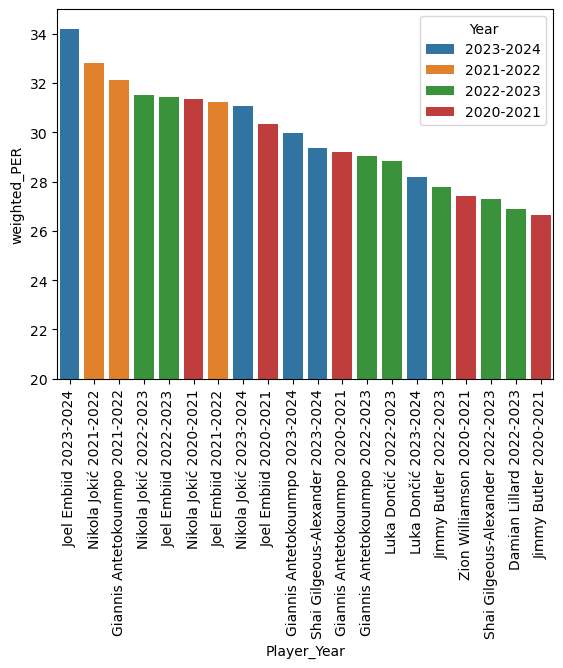

In [121]:
# Repeating Process for 2020-2024
adv_player_stats_2020_2024 = adv_player_stats[(adv_player_stats["Year"] == "2020-2021") | (adv_player_stats["Year"] == "2021-2022") | (adv_player_stats["Year"] == "2022-2023") | (adv_player_stats["Year"] == "2023-2024")] 
adv_player_stats_2020_2024 = adv_player_stats_2020_2024.sort_values("weighted_PER", ascending= False)
adv_player_stats_2020_2024 = adv_player_stats_2020_2024.head(20)
sns.barplot(adv_player_stats_2020_2024, x=adv_player_stats_2020_2024.index, y= adv_player_stats_2020_2024["weighted_PER"], hue=adv_player_stats_2020_2024["Year"])
plt.ylim(20,35)
plt.xticks(rotation=90)
plt.show()


##### MVP 2020-2021 Nikola Jokic
##### MVP 2021-2022 Nikola Jokic
##### MVP 2022-2023 Nikola Jokic
##### MVP 2023-2024 Joel Embiid

### In Conclusion: The data states that according to the PER category from a player's advanced stats, Lebron was the most dominant player by far and the surefire MVP for 8 years according to the PER category. To put this in perspective, the next player in second place is Jokic with 3 MVP's if we were to base it off of the PER Category.

### When I compare this dataset to the list of winners of the MVP award for the past 24 years, despite Lebron still being the player with the most MVPs in the past 24 years at 4, the list varies greatly. One trend I noticed was that a player no matter how dominant they were, was capped off at winning MVP twice in a row. We can view this ss a result of bias from the MVP committe to avoid viewer burnout or loss of interest from viewers as a result of the MVP always going to the same individual. As my data according to the PER category reflect different results.